#Objective
This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

#Question 1

Import your dataset and perform initial analysis and visualization

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the data
data = pd.read_csv('bank.csv')

In [ ]:
data.shape

(11162, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#information about the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
#checking for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no missing values.

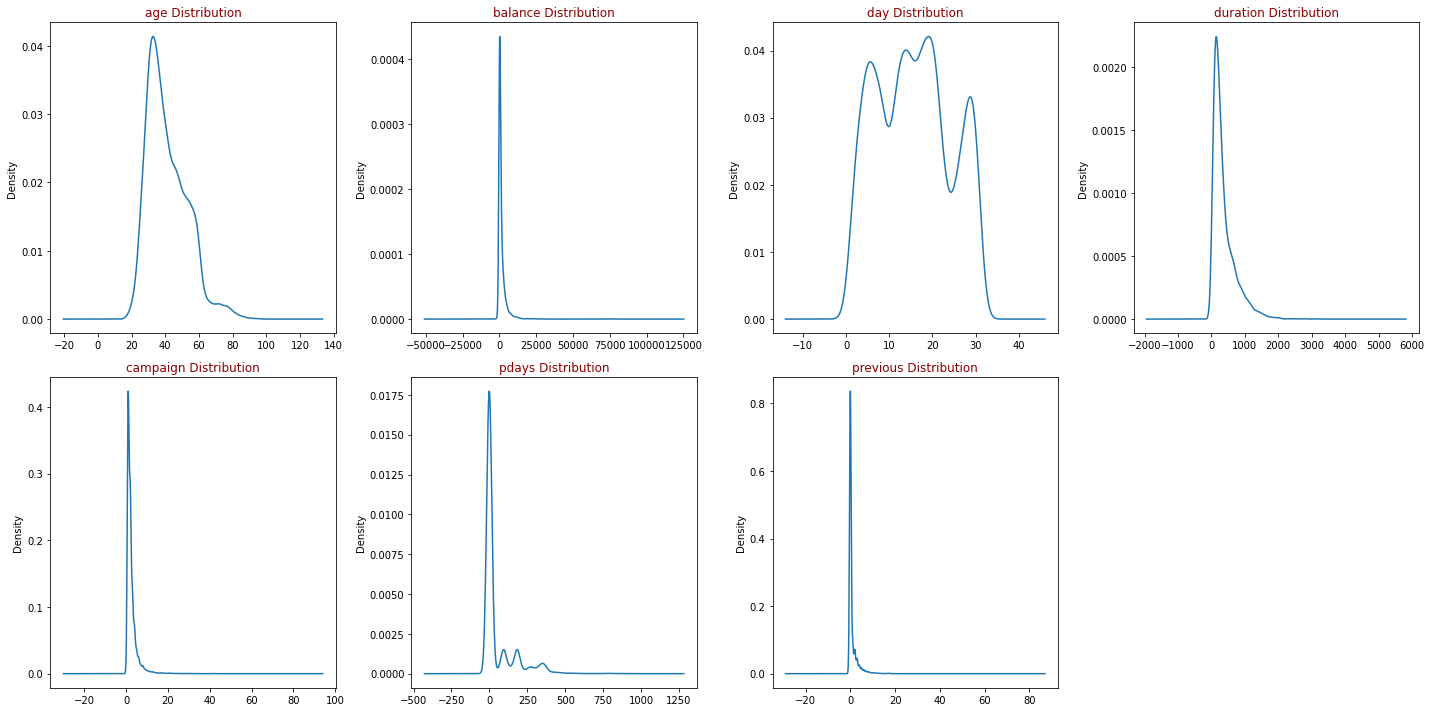

In [ ]:
#visualising the density of all numerical variables
data1=data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
def draw_density(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].plot.kde()
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_density(data1,data1.columns, 2, 4)

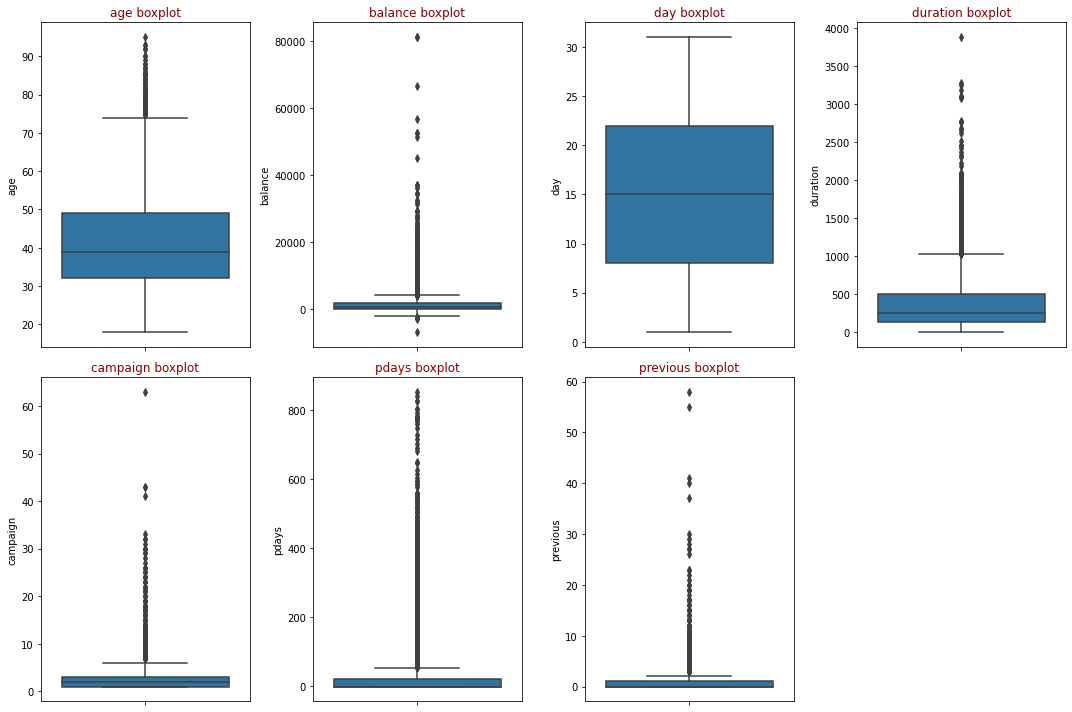

In [ ]:
#visualising the boxplot of all numerical variables 
def draw_boxp(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(y=dataframe[feature])
        ax.set_title(feature+" boxplot",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_boxp(data1,data1.columns,2,4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

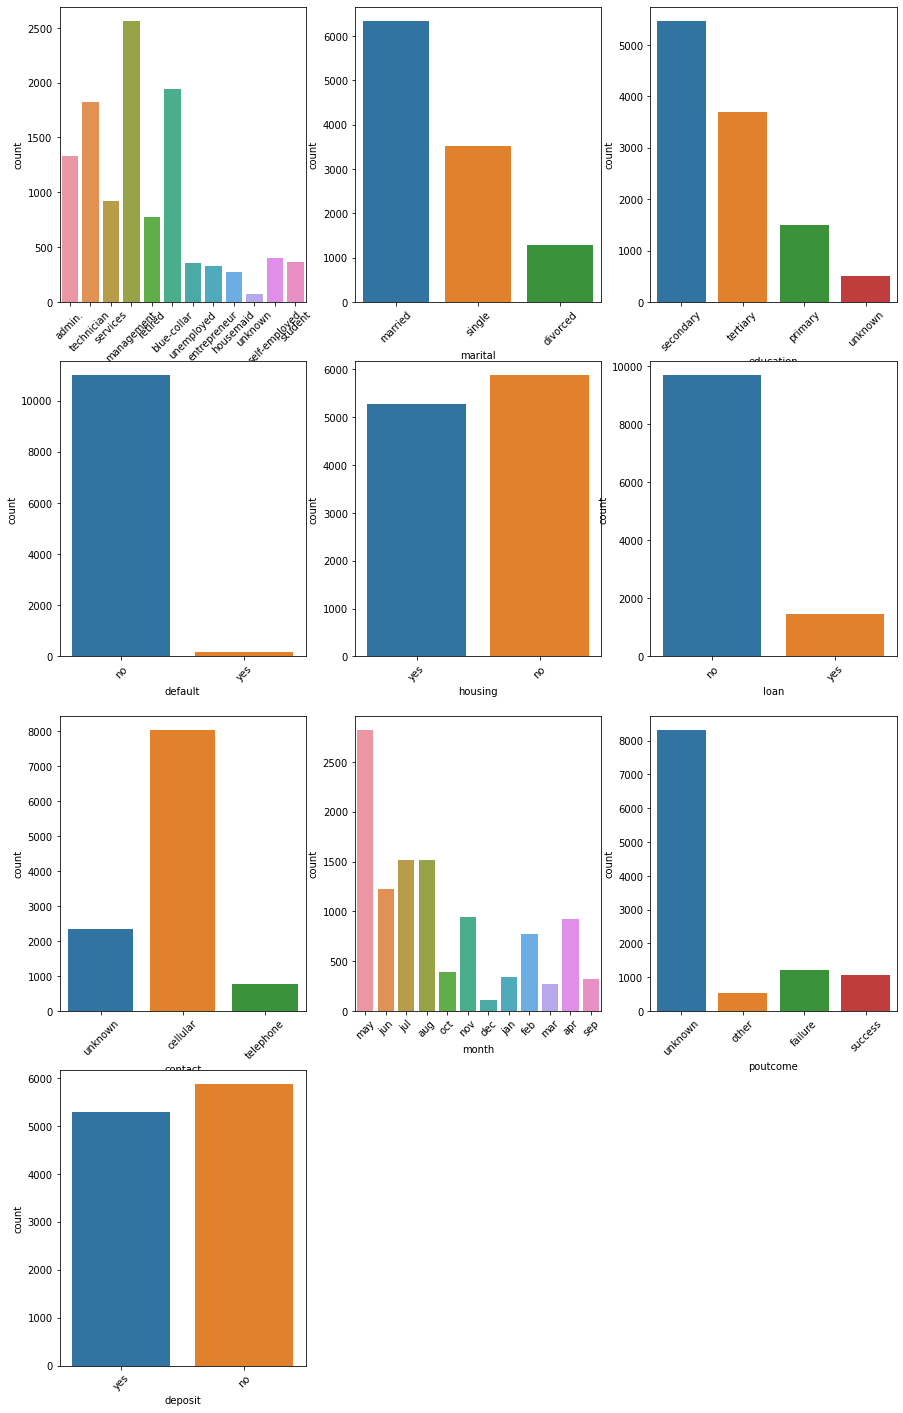

In [ ]:
#exploring all categorical variables 
data2=data[['job','marital', 'education',	'default', 'housing',	'loan',	'contact', 'month', 'poutcome',	'deposit']]
plt.figure(figsize=(15,25))
for i,feature in enumerate(data2.columns):
    plt.subplot(4,3,i+1)
    chart = sns.countplot(data2[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

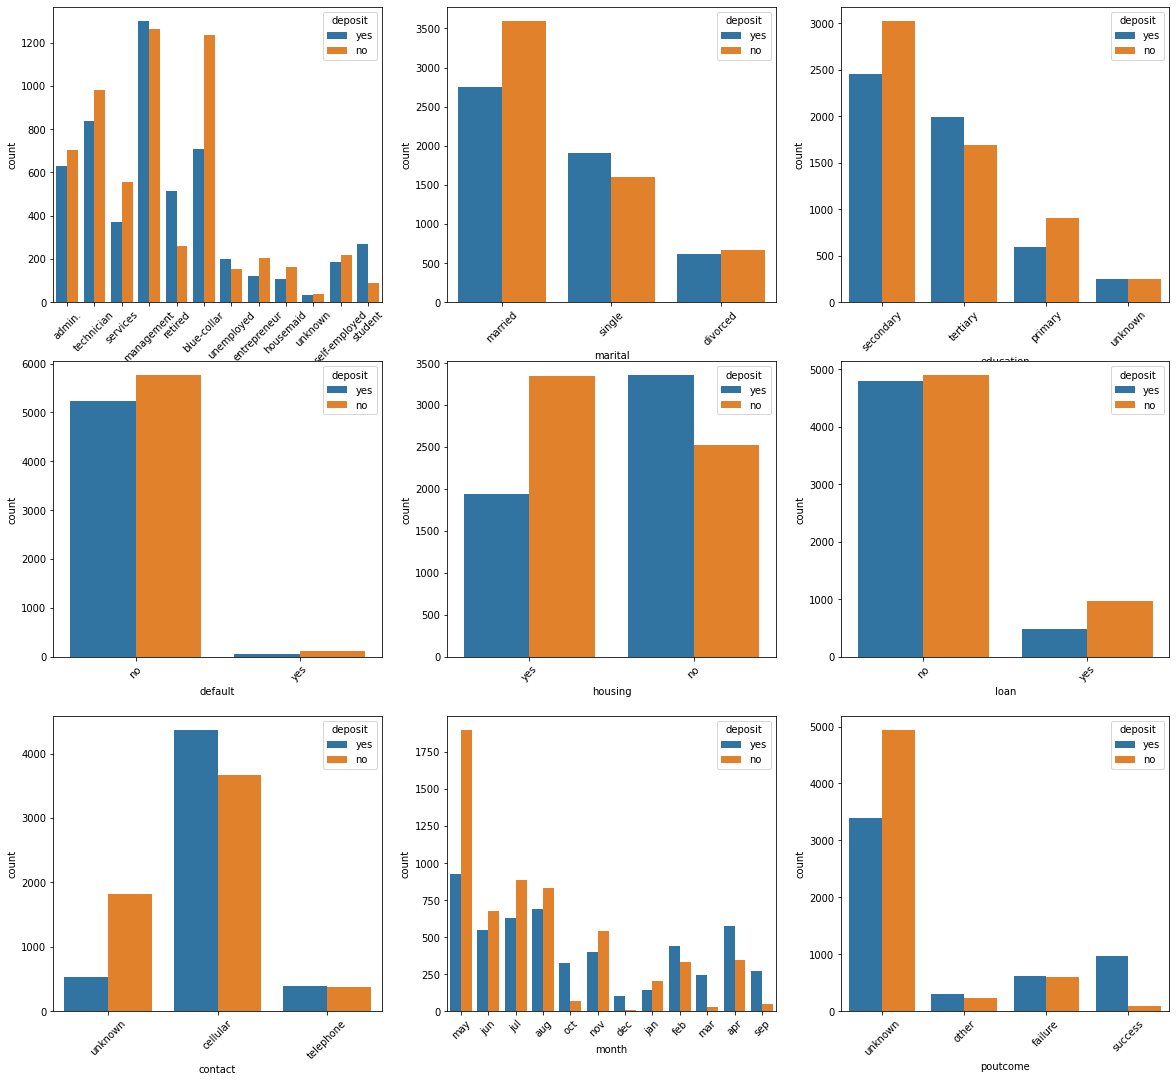

In [ ]:
#Exploring all categorical variables against the deposit 
data3=data2.drop('deposit', axis=1)
plt.figure(figsize=(20,25))
for i,feature in enumerate(data3.columns):
    plt.subplot(4,3,i+1)
    chart = sns.countplot(x=feature, hue='deposit',data=data2)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Attribute - Age

In [ ]:
data_age=data[["age","deposit"]]
data_age.describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


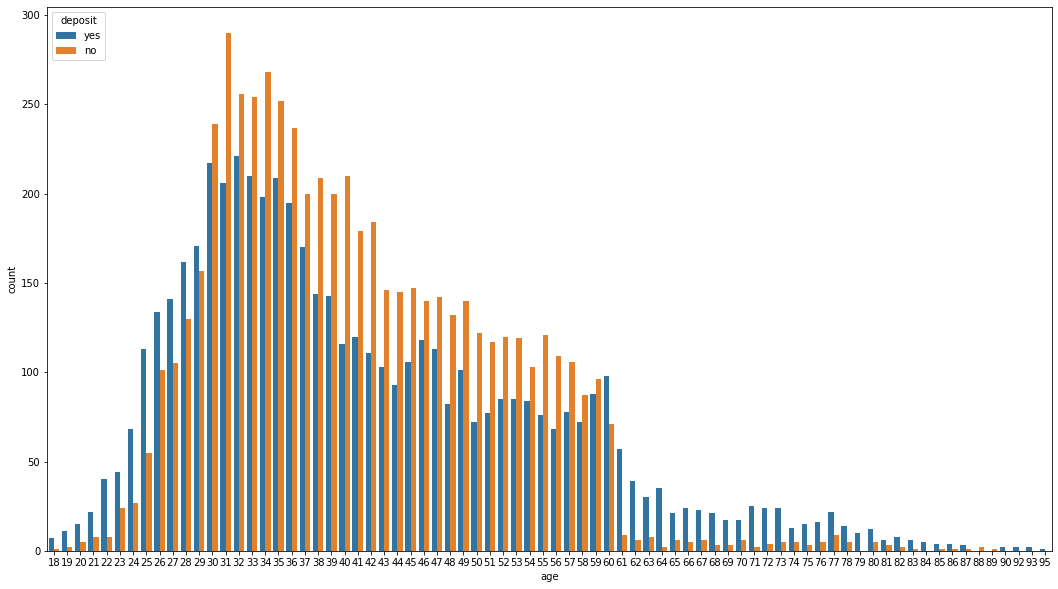

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot("age",data=data,hue="deposit")
plt.show()


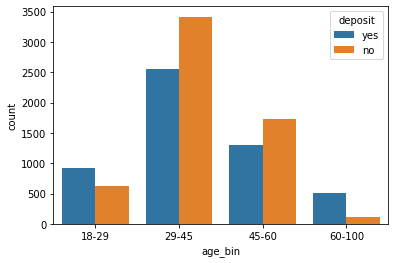

In [ ]:
data["age_bin"]=pd.cut(data.age,bins=[18,29,45,60,100],labels=['18-29','29-45','45-60','60-100'])
sns.countplot(x="age_bin",data=data,hue="deposit")
plt.show()

Customers older than 60 and younger than 30 have the highest deposit customer rates.

Attribute - Job

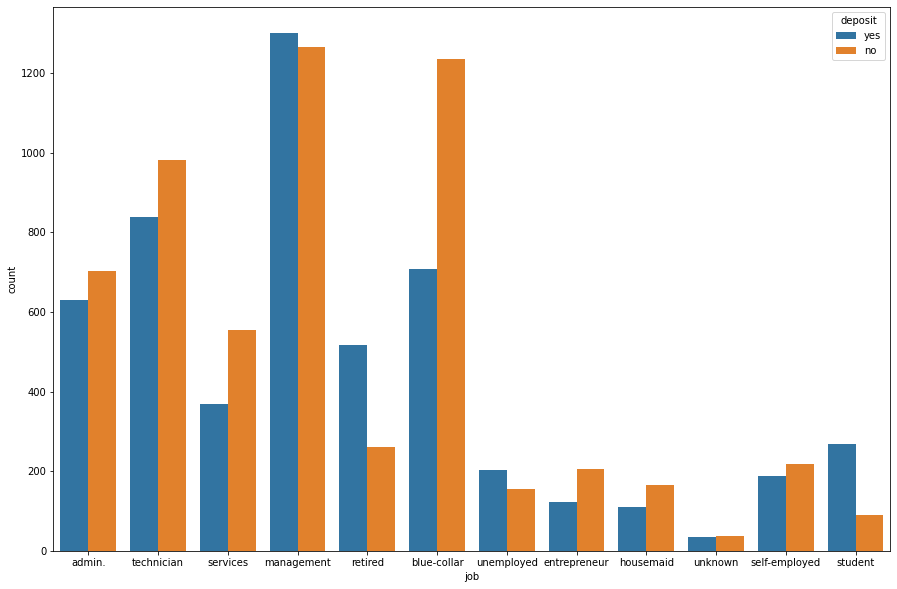

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",hue="deposit",data=data)
plt.show()

Retired and student job categories have the highest deposit customer rates.

Attribute - Marital

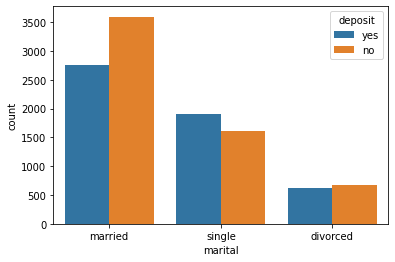

In [ ]:
sns.countplot(x="marital",hue="deposit",data=data)
plt.show()

Singles have the highest deposit customer rates.

Attribute - Education

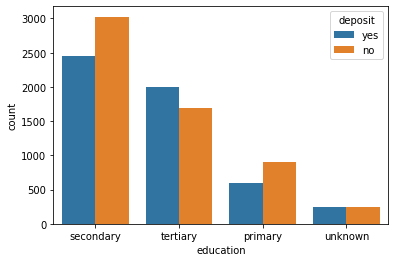

In [ ]:
sns.countplot(x="education",hue="deposit",data=data)
plt.show()

Customers with tertiary education have the highest deposit customer rates.

Attribute - Default

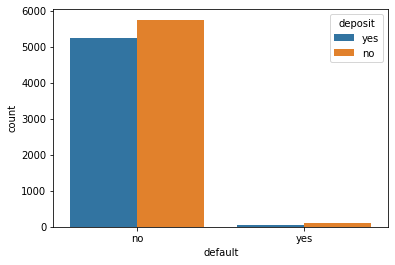

In [ ]:
sns.countplot(x="default",hue="deposit",data=data)
plt.show()

There is no correlation between the default variable and the deposit.

Attribute - Housing

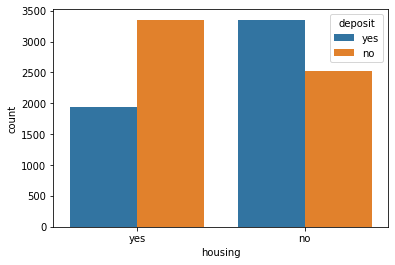

In [ ]:
sns.countplot(x="housing",hue="deposit",data=data)
plt.show()

Customers with no houses have higher deposit customer rates.

Attribute - Loan

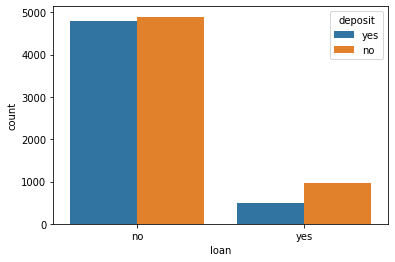

In [ ]:
sns.countplot(x="loan",hue="deposit",data=data)
plt.show()

Customers with no loans have higher deposit customer rates.

Attribute - Contact

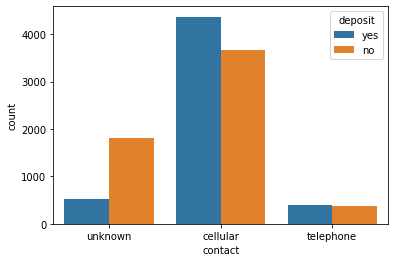

In [ ]:
sns.countplot(x="contact",hue="deposit",data=data)
plt.show()

Customers who provided their cellular number have the highest deposit customer rates.

Attribute - Month

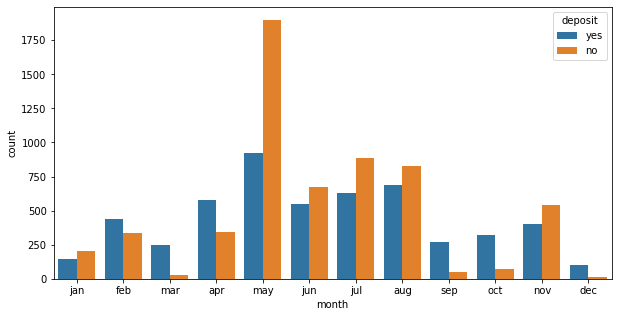

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="month",hue="deposit",data=data,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

Deposits on feb, mar, apr, sep, oct and dec are higher than the other months.

Attribute - Day

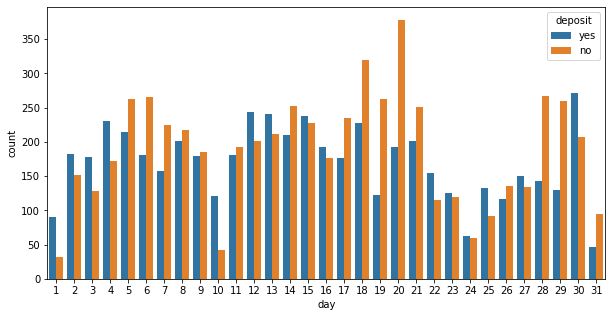

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="day",hue="deposit",data=data)
plt.show()

Deposits on the 1, 2, 3, 4, 10, 12, 13, 15, 16, 22, 23, 24, 25, 27 and 30 are higher than the other days of the month.

Attribute - Campaign

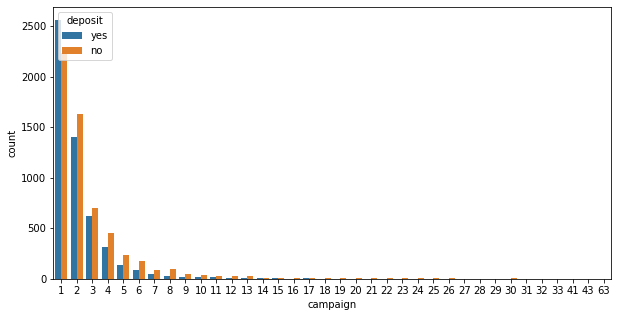

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="campaign",hue="deposit",data=data)
plt.show()

The highest deposit rate is on the first day of the campaign.

Attribute - Pdays

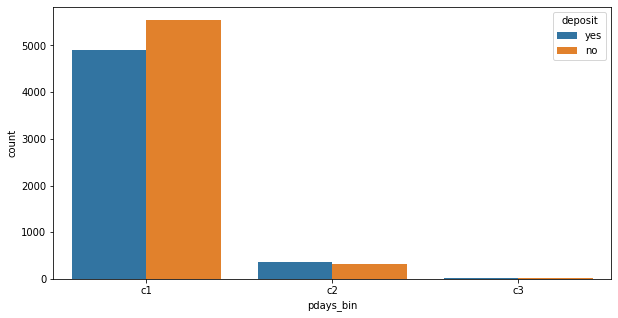

In [ ]:
plt.figure(figsize=(10,5))
data["pdays_bin"]=pd.cut(data.pdays,bins=3,labels=["c1","c2","c3"])
sns.countplot(x="pdays_bin",hue="deposit",data=data)
plt.show()

There is no correlation between pdays variable and the  deposit customer rates.

Attribute - Previous

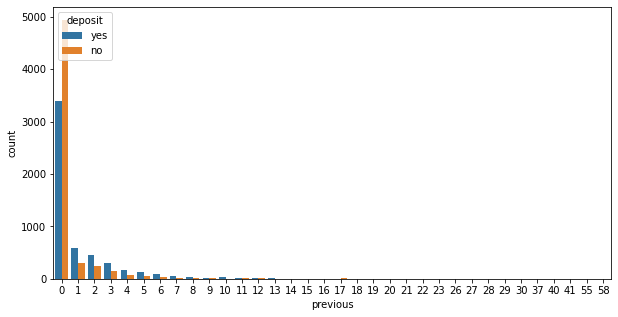

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="previous",hue="deposit",data=data)
plt.show()

Customers who have been contacted between 1 and 6 times before the campaign have higher deposit rates.

Attribute - Poutcome

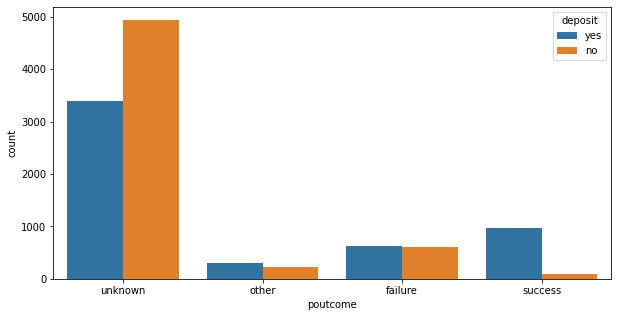

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="poutcome",hue="deposit",data=data)
plt.show()

Customers who were successfully targeted by the previous campaign

#Question 2
Clean the data

In [ ]:
# Preprocessing dataset for yes/no columns ['default','housing','loan','deposit']
for col in ['default','housing','loan','deposit']:
    data[col].replace(['yes', 'no'],[1, 0], inplace=True)

In [ ]:
# Preprocessing data, get dummy for columns ['job','marital', 'education','contact','month','poutcome']
data = pd.get_dummies(data = data, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , prefix = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , drop_first = True)
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#Question 3

Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

In [ ]:
#Seperating features and predictor
X = data.drop(['deposit'], axis=1) 
y = data['deposit']

In [ ]:
#Splitting the dataset into a training set and a testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.10.1
    Uninstalling importlib-metadata-4.10.1:
      Successfully uninstalled importlib-metadata-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
pip install tf_slim

     |████████████████████████████████| 352 kB 3.4 MB/s 


In [ ]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from tensorflow.python.layers import base
import tf_slim as slim

from keras.layers import Dense, Input, Embedding, Reshape, Dropout
from keras.models import Model,Sequential
from keras.layers.merge import concatenate
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm

In [ ]:
#function to create the model
def create_model(activation='relu', dropout_rate=0.5, lr=0.01, optimizer='adam'):
  
  model = Sequential()
  model.add(Dense(128, input_dim=42, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(128, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


In [ ]:
# Standardizing the data
scaler = StandardScaler()
  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#creating the model 
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=50, activation='relu', dropout_rate=0.5, lr=0.01) 

#defining the grid search parameters
activation = ['relu','tanh', 'sigmoid','linear']
dropout_rate = [0.0, 0.2, 0.3, 0.5, 0.7, 0.9]
optimizer = ['adam','SGD']
lr = [0.001, 0.01, 0.1, 0.2]



# Prepare the Grid
param_grid = dict(activation=activation, dropout_rate=dropout_rate, optimizer=optimizer, lr=lr) 

# GridSearch in action
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,  cv=3, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)

# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 192 candidates, totalling 576 fits


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.7394 - accuracy: 0.5963
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.6988
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7558
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7893
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7996
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8112
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8148
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8232
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8217
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.3982 - accura

In [ ]:
#Implementing the best parameters for DNN
activation = 'relu'
dropout_rate = 0.7
optimizer = 'SGD'
lr = 0.001

In [ ]:
def make_dnn(clf,clf_name,Title,X_train,y_train,X_test,y_test):

  # Fit the model
  clf.fit(X_train_scaled, y_train, epochs=100, batch_size=50)

  # Apply the model to the holdout data
  y_pred = clf.predict(X_test_scaled)

  # Set threshold = 0.5. Increasing the threshold decreases the recall.
  y_pred = [0 if x <0.5 else 1 for x in y_pred]

  
  dnn_score=round(accuracy_score(y_test, y_pred) * 100,2)
  print(Title,'Dataset test accuracy_score',dnn_score)
  print(classification_report(y_test, y_pred))
  dnn_tn, dnn_fp, dnn_fn, dnn_tp = confusion_matrix(y_test, y_pred).ravel()
  print(Title,'Dataset confusion_matrix: \n tn: %s \n fp: %s \n fn: %s \n tp: %s' % (dnn_tn, dnn_fp, dnn_fn, dnn_tp ))
  return dnn_score

In [ ]:
# Wrapping the model using the function we created
ker = KerasRegressor(build_fn=create_model,verbose=0,shuffle=True)
ker_score=make_dnn(ker,"ker","\n-- Deep Neural Network (DNN)",X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"



-- Deep Neural Network (DNN) Dataset test accuracy_score 85.19
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1742
           1       0.81      0.91      0.86      1607

    accuracy                           0.85      3349
   macro avg       0.86      0.85      0.85      3349
weighted avg       0.86      0.85      0.85      3349


-- Deep Neural Network (DNN) Dataset confusion_matrix: 
 tn: 1390 
 fp: 352 
 fn: 144 
 tp: 1463
